In [1]:
import tensorflow as tf
from cv2 import imread,resize, imshow
import cv2 as cv
import numpy as np

In [87]:
model = tf.lite.Interpreter("garbage/models/imageSegmentaion.tflite")
image = imread("garbage/test.jpg")
color = [np.asarray((i,i,i))*12 for i in range(21)]

In [88]:
def predict(image):
    mimage = resize(image,(257,257)).astype(np.float32)/255
    input_tensor = model.get_input_details()[0]
    output_tensor = model.get_output_details()[0]
    model.allocate_tensors()
    model.set_tensor(input_tensor['index'],[mimage])
    model.invoke()
    res = model.get_tensor(output_tensor['index'])[0]
    return res

def getSegmentMask(res):
    w, h, classes = res.shape
    seg = np.zeros((w,h),dtype=np.int16)

    for y in range(h):
        for x in range(w):
            maxVal = 0
            for c in range(classes):
                val = res[y,x,c]
                if (c == 0) or (val > maxVal):
                    maxVal = val
                    seg[y][x] = c
    op = np.zeros((w,h,3))

    for r in range(h):
        for s in range(w):
            op[s][r] = color[seg[s,r]]

    print(op.shape)
    return seg,op

In [89]:
seg,op = getSegmentMask(predict(image))

(257, 257, 3)


In [92]:

cv.imshow("mask",op)
cv.waitKey(0)
cv.destroyAllWindows()

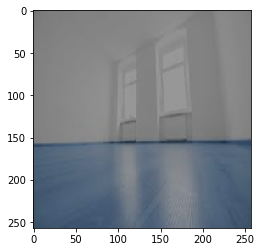

In [91]:
final = resize(image,(257,257))
from matplotlib import pyplot as plt

fig = plt.figure(frameon=False)
plt.imshow(final)
plt.imshow(op, alpha=0.4)
plt.show()

In [60]:
cv.destroyAllWindows()